<a href="https://colab.research.google.com/github/AjeelAhmed1998/mlsl/blob/main/PartA___NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


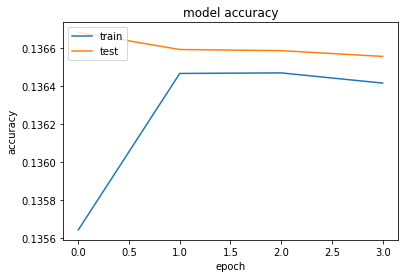

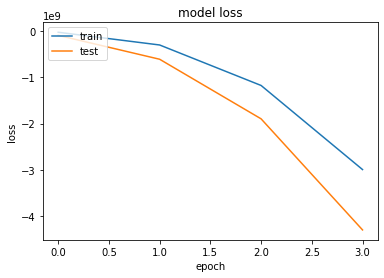

In [ ]:
 
# using keras for the creation of 
# the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
# for dataset manipulation
import pandas as pd
import io
# for visualization
import matplotlib.pyplot as plt
import numpy as np
# for preprocessing, batching and splitting the dataset to 
# training and testing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers import Flatten
 
# we had to do some data cleaning beforehand as the dataset 
# has some irregular features such 
# as dates that are hard to convert to a computable numerical value
def cleaning_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    keep_indices = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[keep_indices].astype(np.float64)
 
 
# using pandas in order to read the dataset provided in the drive
dataset = pd.read_csv('/content/drive/My Drive/Copy of IoTID20.csv', encoding='utf-8')
 
# converting all features to object type 
for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])
data = cleaning_dataset(dataset)
 
 
# these would be our features 
X = data.iloc[:, 0:85].values
# this column contains our labels
y = data.iloc[:, -1].values
 
 
# data preprocessing 
encoder = LabelEncoder()
encoder.fit(y)
encoder_y = encoder.transform(y)
X_scaled = preprocessing.scale(X)
 
 
# splitting the datast into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoder_y, test_size=0.20, random_state=52)
# creating the model 
model = Sequential()
# Dense layer, activation function used are ReLU and sigmoid because the classification 
# is binary so the sigmoid take all inputs and put them into values from 0 to 1 
model.add(Dense(20, input_dim=85, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
 
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
# using BCE for loss function and for optimization we are using Adam 
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# fitting the model , we want 66% of the dataset to be training and 
# 33% of it to be for validation 
# using for 4 epochs each of them have having ten batches so we
# do not use too much computation 
# and only update the weights after every batch instead of after 
# datapoint computation
history = model.fit(X_train, y_train, validation_split=0.33, epochs=4, batch_size=10, verbose=0)
 
# data visualisation for easy viewing 
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
